[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alok8663/Deep_Learning/blob/main/Unsupervised_Deep_Learning/SOMs.ipynb)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [6]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [8]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=eb6eaa33babaad0de662f392becd339d4818f50108073c751cafadb638b7c364
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [11]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

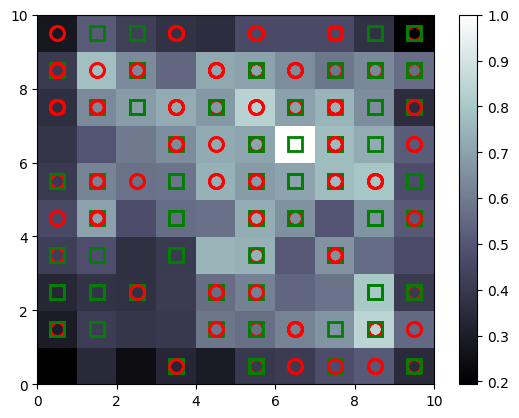

In [15]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,
      w[1]+0.5,
      markers[y[i]],
      markeredgecolor=colors[y[i]],
      markerfacecolor='None',
      markersize=10,
      markeredgewidth=2)
show()

In [18]:
mappings=som.win_map(X)
frauds=np.concatenate((mappings[(8,1)],mappings[(6,8)]),axis=0)

In [19]:
frauds=sc.inverse_transform(frauds)

In [24]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15590434.0,0.0,25.00,0.875,2.0,14.0,8.0,1.040,1.0,0.0,0.0,1.0,2.0,160.0,5861.0
1,15767358.0,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0,1.0
2,15567839.0,0.0,28.58,3.540,2.0,3.0,5.0,0.500,1.0,0.0,0.0,1.0,2.0,171.0,1.0
3,15671014.0,0.0,25.33,2.085,2.0,8.0,8.0,2.750,1.0,0.0,0.0,1.0,2.0,360.0,2.0
4,15642336.0,0.0,57.08,0.335,2.0,3.0,5.0,1.000,1.0,0.0,0.0,1.0,2.0,252.0,2198.0
5,15788634.0,0.0,25.75,0.500,2.0,8.0,8.0,0.875,1.0,0.0,0.0,1.0,2.0,491.0,1.0
6,15663942.0,1.0,27.83,1.000,1.0,2.0,8.0,3.000,0.0,0.0,0.0,0.0,2.0,176.0,538.0
7,15720529.0,1.0,21.08,4.125,1.0,3.0,8.0,0.040,0.0,0.0,0.0,0.0,2.0,140.0,101.0
8,15728906.0,1.0,29.25,13.000,2.0,2.0,8.0,0.500,0.0,0.0,0.0,0.0,2.0,228.0,1.0
9,15793317.0,1.0,21.08,10.085,1.0,10.0,8.0,1.250,0.0,0.0,0.0,0.0,2.0,260.0,1.0
